In [1]:
# preample
import matplotlib.pyplot as plt
from scipy.signal import freqs,periodogram
import numpy as np
from tensorflow.keras import layers, Model
from qmldataset.system_layers.noise_layer import NoiseLayer

2021-09-26 16:37:47.545645: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
profiles = ['Type 5']
total_duration = 1
num_time_steps = 1024
num_realization = 200

In [3]:
dummy_input       = layers.Input(shape=(1,))
noise_time_domain = NoiseLayer(
    total_duration, 
    num_time_steps, 
    num_realization, 
    profiles[0], name="noise")(dummy_input)
model             = Model( inputs = dummy_input, outputs=noise_time_domain )
model.summary()
noise = model.predict(np.ones((1,)))

2021-09-26 16:37:49.476223: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 16:37:49.477503: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-26 16:37:49.547628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 16:37:49.548992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0e:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.43GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2021-09-26 16:37:49.549164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-26 16:37:49.554532: I tensorflow/stream_executor/platform/default/

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
noise (NoiseLayer)           (None, 1024, 200, 1)      0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


2021-09-26 16:37:50.800089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 16:37:50.817948: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3094175000 Hz
2021-09-26 16:37:50.967622: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2021-09-26 16:37:51.207049: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-26 16:37:51.601334: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


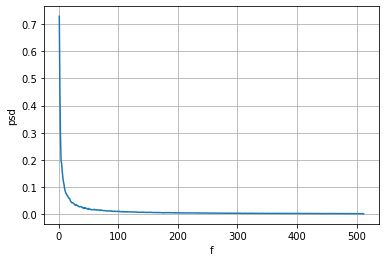

In [4]:
# display noise if exists
for idx_profile,profile in enumerate(profiles): 
    if profile in ['Type 2','Type 3','Type 4'] or (profile=='Type 6' and p=='Type 0'): 
        # estimate the correlation matrix of the noise
        correlation = 0
        for k in range(num_realization):
            correlation = correlation + noise[0,:,k:k+1,idx_profile]@noise[0,:,k:k+1,idx_profile].T
        correlation = correlation/num_realization
        # plot correlation matrix
        plt.figure()
        plt.matshow(correlation,0)
        plt.colorbar()
        p = 0
    elif profile in ['Type 1','Type 5']:
        # estimate the PSD of the noise
        psd = 0
        for k in range(num_realization):
            f, Pxx = periodogram(noise[0,:,k,idx_profile],num_time_steps/total_duration)            
            psd = psd + Pxx
        psd = psd/num_realization
        plt.figure()
        plt.plot(f[f>0], psd[1:])
        plt.xlabel('f')
        plt.ylabel('psd')
        plt.grid()
        p = 1